In [44]:
from src.titanic.config import data_dir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

#### We upload the file as a Pandas DataFrame

In [45]:
df = pd.read_csv(data_dir / 'titanic_processed.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_c
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Dead
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Alive
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alive
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Alive
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Dead


## Let's formule and validate some hypothesis

### 1. Determine if the survival rate is associated to the class of passenger

In [46]:
df1 = df.groupby(['Pclass', 'Survived_c']).size().unstack()
df1

Survived_c,Alive,Dead
Pclass,,
1,120,64
2,83,90
3,85,270


<function matplotlib.pyplot.show(close=None, block=None)>

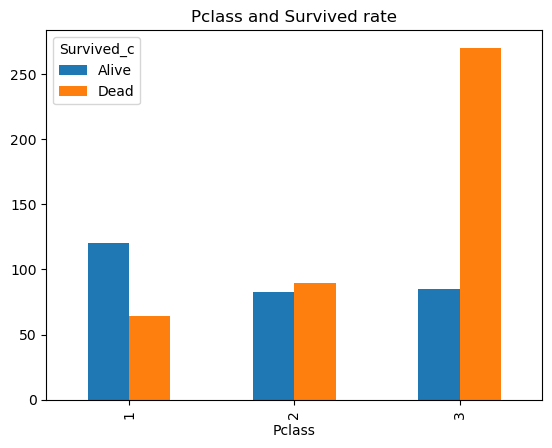

In [47]:
df1.plot(kind= 'bar', stacked=False)
plt.title("Pclass and Survived rate")
plt.show

The bars do not look alike, so there is possibily that the survival rate and the Passenger class are not independent between them

We support on chi-square method to reject or not the following hyphotesis

H0: The survival rate and passenger class are indepedent

Ha: The survival rate and passenger class are not indepedent

In [48]:
chi2, p, dof, expected = chi2_contingency(df1)
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)

Chi-square statistic: 91.0807454879102
P-value: 1.6675060315554516e-20
Degrees of freedom: 2


> Since 91.08 is greater than the DP. We reject H0. In consequence, the survival rate and passenger class are not independent.

### 2. Determine if the survival rate is associated to the gender

In [49]:
df2 = df.groupby(['Sex', 'Survived_c']).size().unstack()
df2

Survived_c,Alive,Dead
Sex,,
female,195,64
male,93,360


<function matplotlib.pyplot.show(close=None, block=None)>

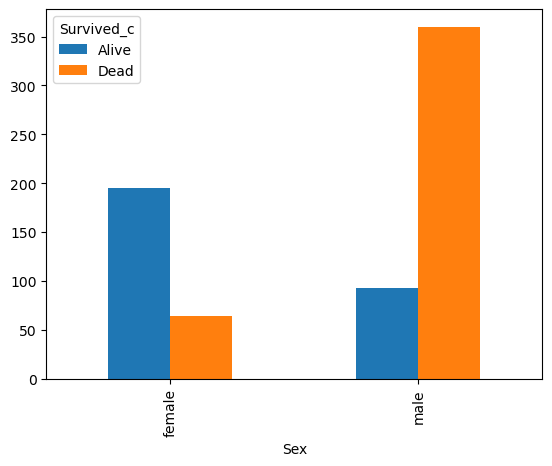

In [50]:
df2.plot(kind='bar', stacked= False)
plt.show

H0: The survival rate and gender are indepedent

Ha: The survival rate and gender class are not indepedent

In [51]:
chi2, p, dof, expected = chi2_contingency(df2)
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)

Chi-square statistic: 202.86944877617123
P-value: 4.939416685451492e-46
Degrees of freedom: 1


>Since 202.86 is greater than the DP. We reject H0. In consequence, the survival rate and 'sex' are not independent.

### 3. Determine the survival rate is associated to the age

In [52]:
df3 = df.loc[: , ["Age","Survived_c"]]
df3.head()

,Age,Survived_c
0,22.0,Dead
1,38.0,Alive
2,26.0,Alive
3,35.0,Alive
4,35.0,Dead


<function matplotlib.pyplot.show(close=None, block=None)>

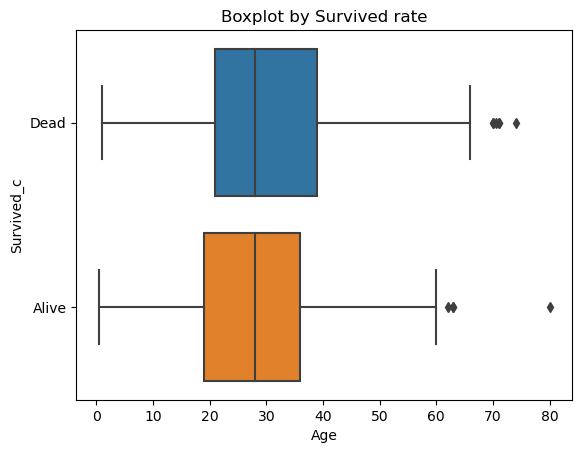

In [53]:
sns.boxplot(x='Age', y='Survived_c', data = df3)
plt.title('Boxplot by Survived rate')
plt.show

In [54]:
df3_dead = df3[df3["Survived_c"]=="Dead"]["Age"]
df3_alive = df3[df3["Survived_c"]=="Alive"]["Age"]

d_q1 = np.percentile(df3_dead, 25)
d_q2 = np.percentile(df3_dead, 50) 
d_q3 = np.percentile(df3_dead, 75)

a_q1 = np.percentile(df3_alive, 25)
a_q2 = np.percentile(df3_alive, 50)
a_q3 = np.percentile(df3_alive, 75)

print(d_q1, " ", d_q2, " ", d_q3)
print(a_q1, " ", a_q2, " ", a_q3)

21.0   28.0   39.0
19.0   28.0   36.0


> Despite some outliers, the median of people who died and the median of who lived are the same. Besides, the first and third quartiles are not so different. In conclusion, the age and the survival rate are not related.